In [1]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

# to get deterministic output
tf.random.set_seed(123)

sys.path.append(os.path.abspath(".."))

### Loading the Dataset

In [2]:
df = pd.read_csv("../datasets/perceptron_toydata-truncated.txt", sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [3]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

print("Train set:", X_train.shape, y_train.shape)

Train set: (20, 2) (20,)


In [4]:
counts = Counter(y_train)
for key, value in counts.items():
    print(f"{key}: {value}")

0: 10
1: 10


### Visualize the Dataset

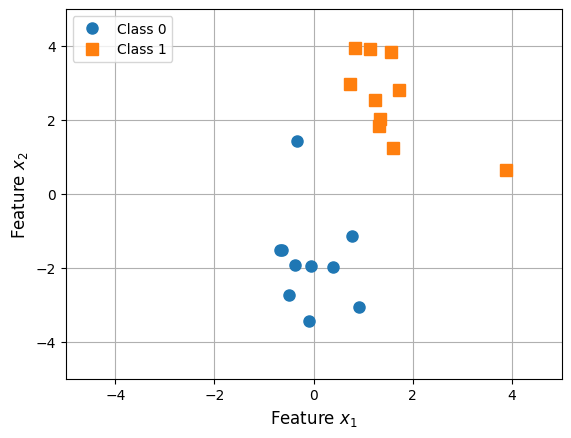

In [5]:
from modules.plotting_helper import plot_feature2d
plot_feature2d(X_train, y_train, markersize=8)

### Design the Model
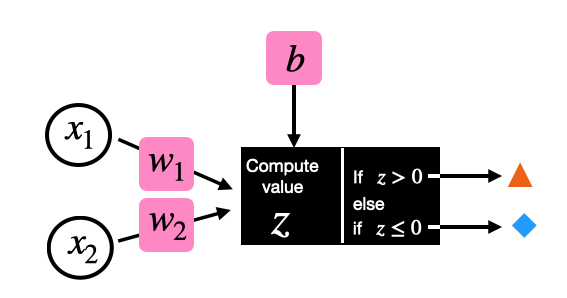

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(2,)),  
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=10.0),
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

### Train the Model

In [7]:
training = model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.9000 - loss: 0.1625
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9500 - loss: 0.0921
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9500 - loss: 0.0584
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0473
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 1.0000 - loss: 0.0410
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0362
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 1.0000 - loss: 0.0324
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.0294
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.0268
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.0247


In [8]:
weights, bias = model.layers[0].get_weights()
print("Bias:", bias)
print("Weights:", weights)

Bias: [-2.7480574]
Weights: [[2.5547755]
 [1.6127303]]


### Evaluate the model

In [9]:
predictions = model.predict(X_train)
y_pred_class = predictions > 0.5
train_acc = accuracy_score(y_pred_class, y_train)
print(f"Train Accuracy: {train_acc:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Train Accuracy: 1.00


In [10]:
cmat = confusion_matrix(y_train, y_pred_class)
print("Confusion Matrix:")
print(cmat)

Confusion Matrix:
[[10  0]
 [ 0 10]]


### Visualize the Results

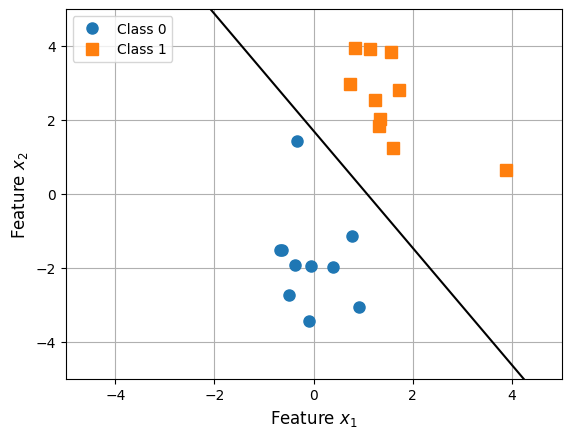

In [11]:
plot_feature2d(X_train, y_train, bias, weights, markersize=8)